In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
tf.reset_default_graph()
with tf.Session() as sess:
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], './lenet5_trained_model')
    parameters = {
        'W1': sess.run('W1:0'),
        'W2': sess.run('W2:0'),
        'W3': sess.run('fully_connected/weights:0'),
        'b3': sess.run('fully_connected/biases:0'),
        'W4': sess.run('fully_connected_1/weights:0'),
        'b4': sess.run('fully_connected_1/biases:0'),
        'W5': sess.run('fully_connected_2/weights:0'),
        'b5': sess.run('fully_connected_2/biases:0')   
    }

INFO:tensorflow:Restoring parameters from ./lenet5_trained_model/variables/variables


In [5]:
for key, val in parameters.iteritems():
    print key, val.shape

b4 (84,)
b5 (10,)
W5 (84, 10)
W4 (120, 84)
W3 (400, 120)
W2 (5, 5, 6, 16)
W1 (5, 5, 1, 6)
b3 (120,)


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
X_valid = mnist.validation.images.reshape(-1, 28, 28, 1)
Y_valid = mnist.validation.labels

(100, 28, 28, 1)


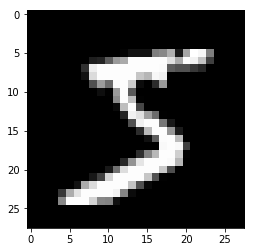

Prediction: 5


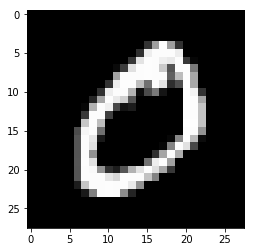

Prediction: 0


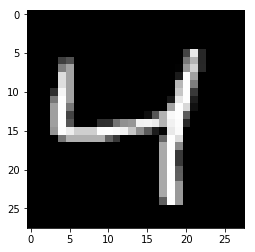

Prediction: 4


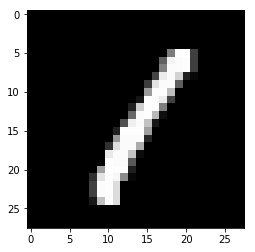

Prediction: 1


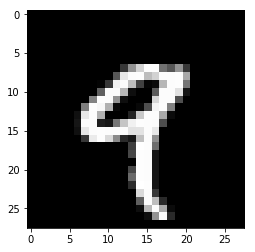

Prediction: 9


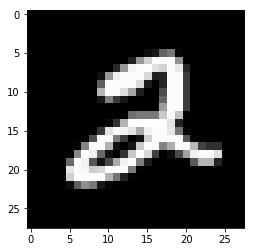

Prediction: 2


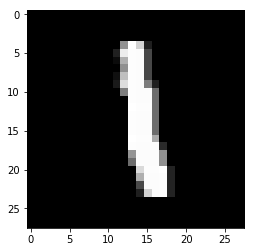

Prediction: 1


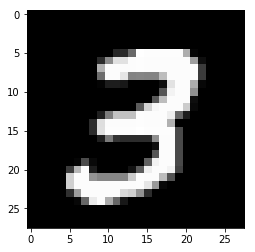

Prediction: 3


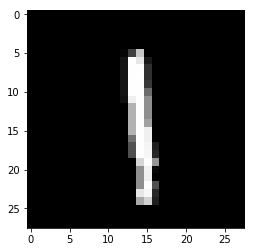

Prediction: 1


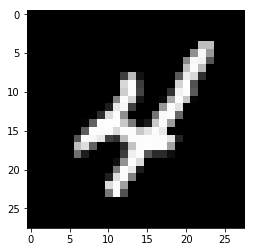

Prediction: 4


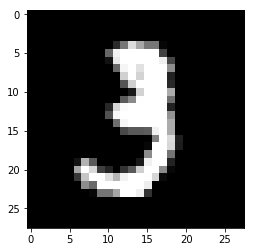

Prediction: 3


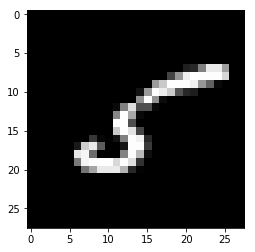

Prediction: 5


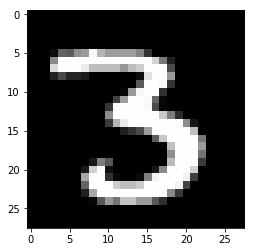

Prediction: 3


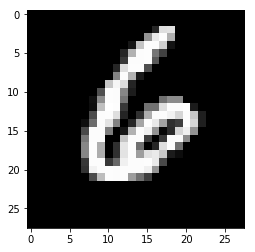

Prediction: 6


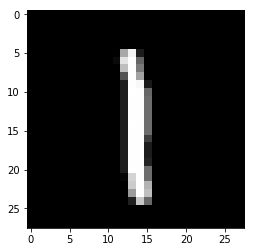

Prediction: 1


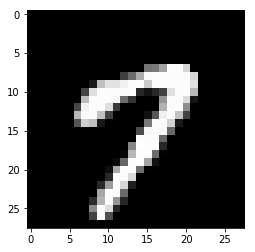

Prediction: 7


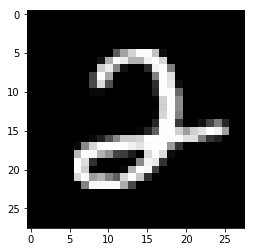

Prediction: 2


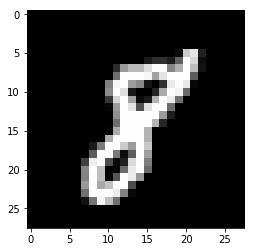

Prediction: 8


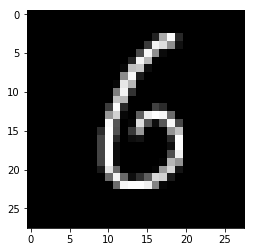

Prediction: 6


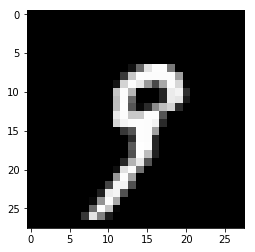

Prediction: 9


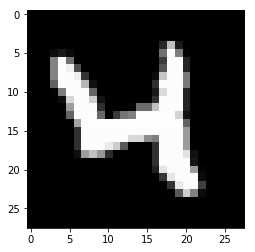

Prediction: 4


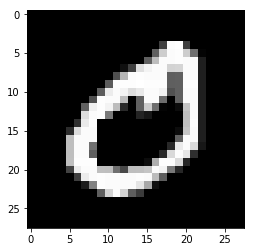

Prediction: 0


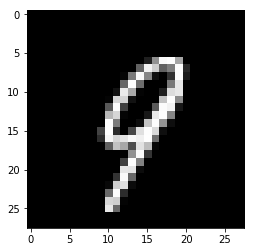

Prediction: 9


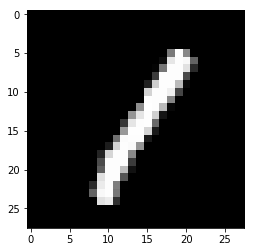

Prediction: 1


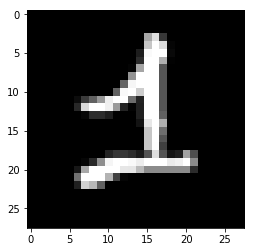

Prediction: 1


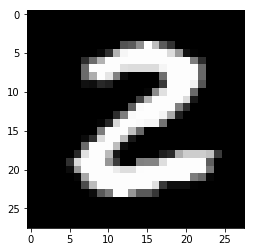

Prediction: 2


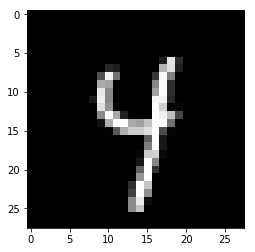

Prediction: 4


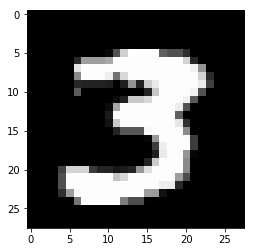

Prediction: 3


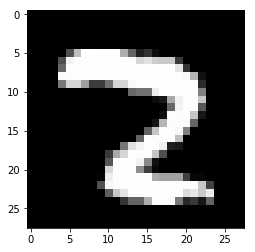

Prediction: 2


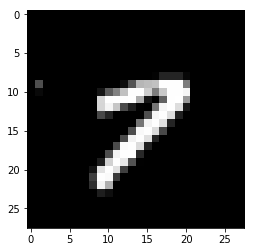

Prediction: 7


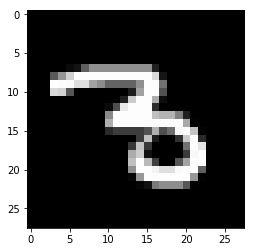

Prediction: 3


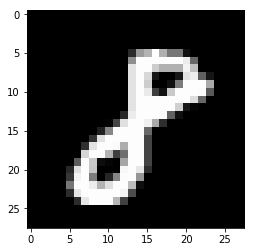

Prediction: 8


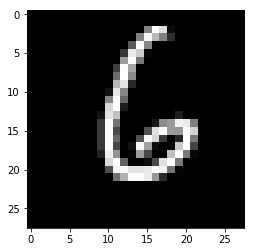

Prediction: 6


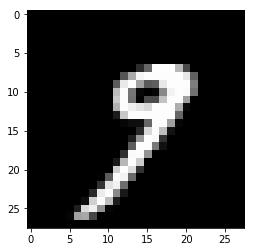

Prediction: 9


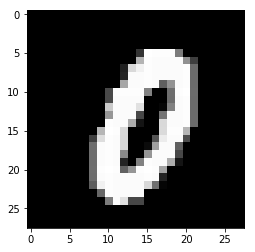

Prediction: 0


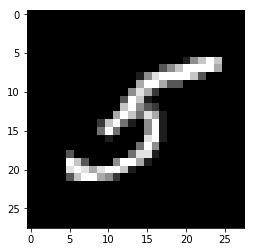

Prediction: 5


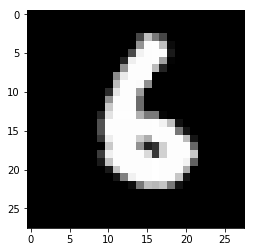

Prediction: 6


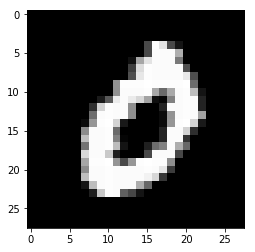

Prediction: 0


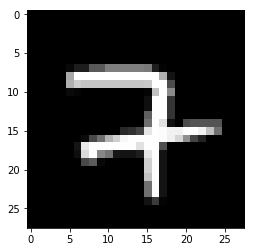

Prediction: 7


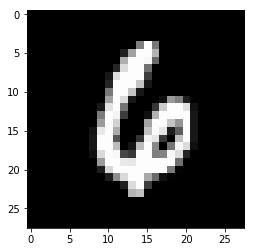

Prediction: 6


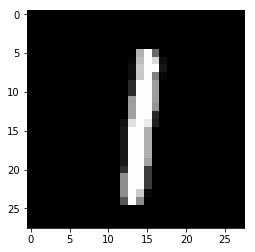

Prediction: 1


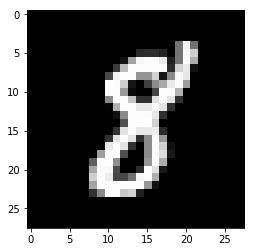

Prediction: 8


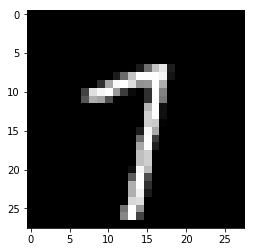

Prediction: 7


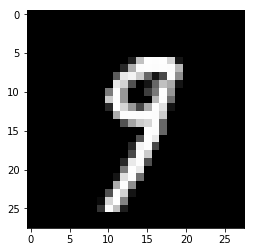

Prediction: 9


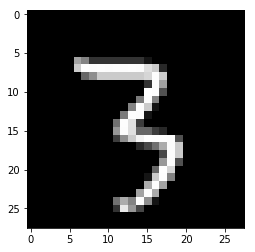

Prediction: 3


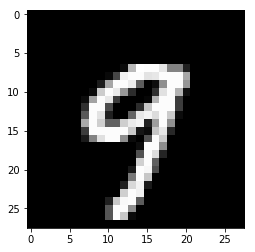

Prediction: 9


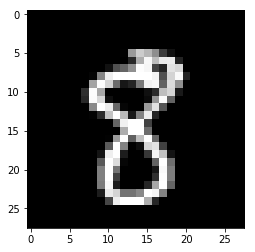

Prediction: 8


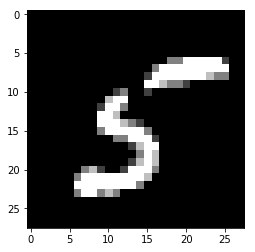

Prediction: 5


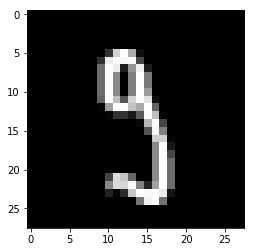

Prediction: 9


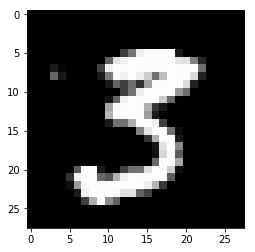

Prediction: 3


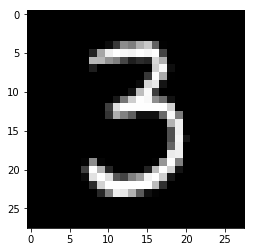

Prediction: 3


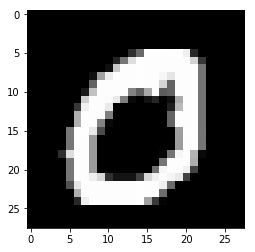

Prediction: 0


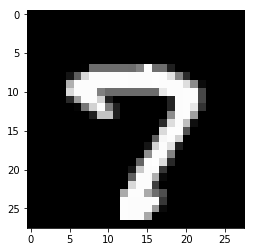

Prediction: 7


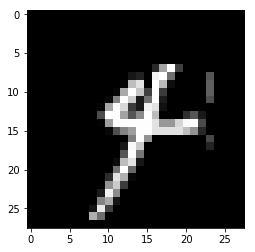

Prediction: 4


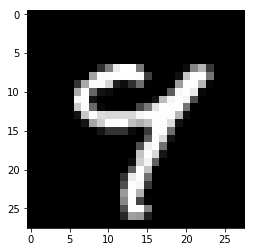

Prediction: 9


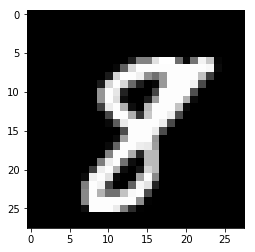

Prediction: 8


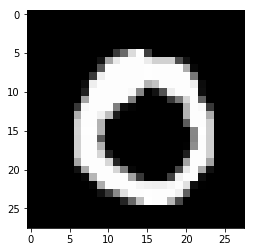

Prediction: 0


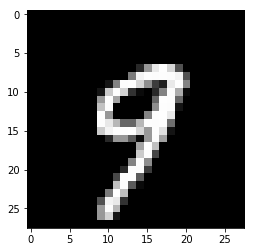

Prediction: 9


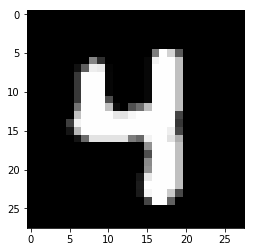

Prediction: 4


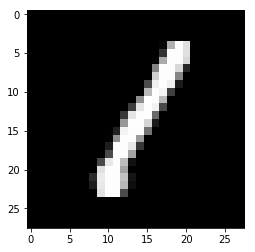

Prediction: 1


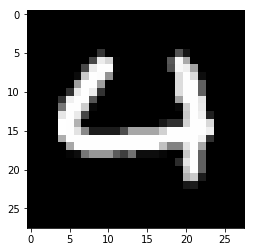

Prediction: 4


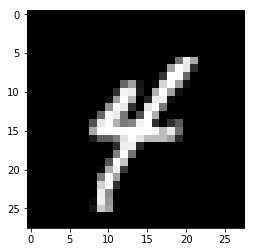

Prediction: 4


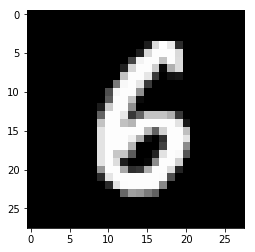

Prediction: 6


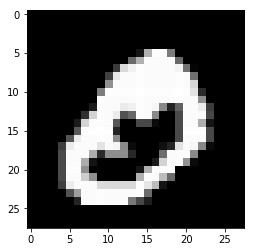

Prediction: 0


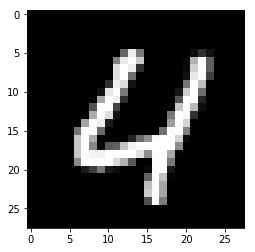

Prediction: 4


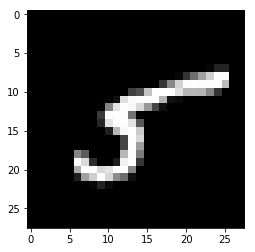

Prediction: 5


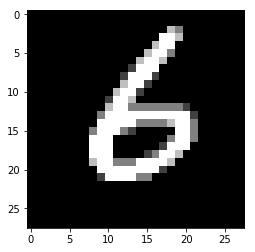

Prediction: 6


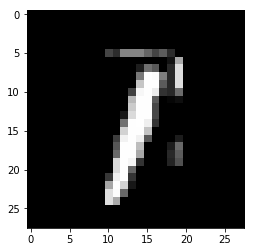

Prediction: 1


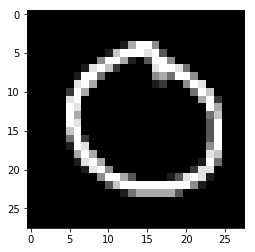

Prediction: 0


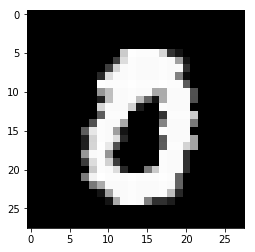

Prediction: 0


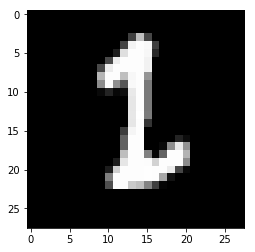

Prediction: 1


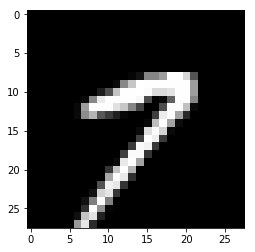

Prediction: 7


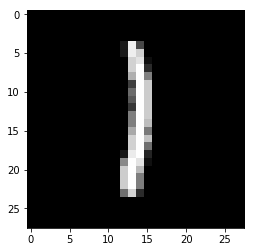

Prediction: 1


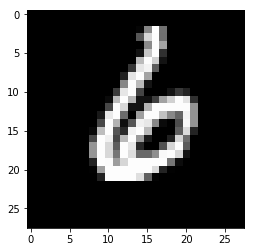

Prediction: 6


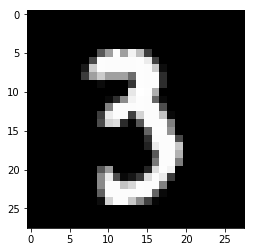

Prediction: 3


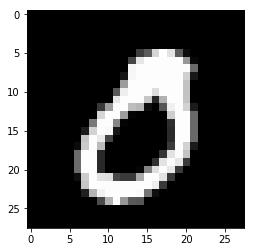

Prediction: 0


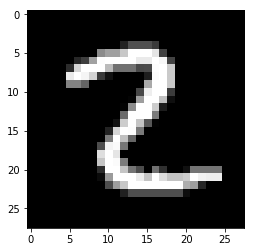

Prediction: 2


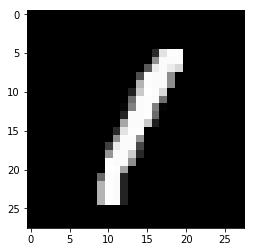

Prediction: 1


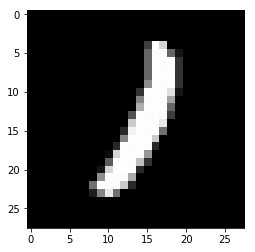

Prediction: 1


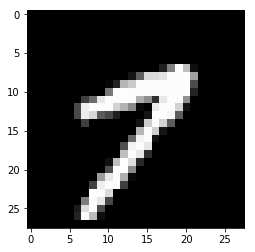

Prediction: 7


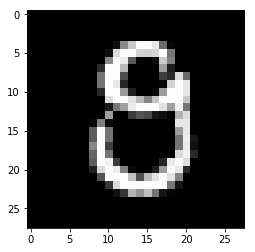

Prediction: 8


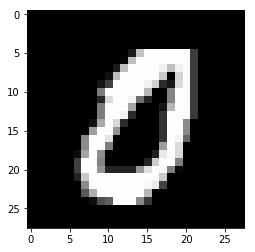

Prediction: 0


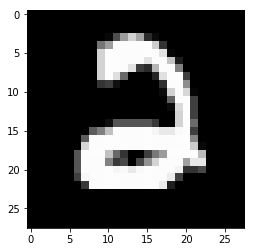

Prediction: 2


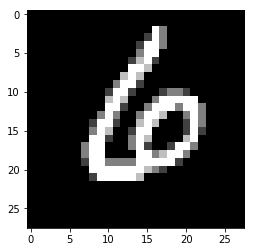

Prediction: 6


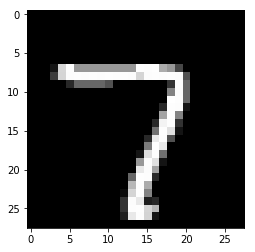

Prediction: 7


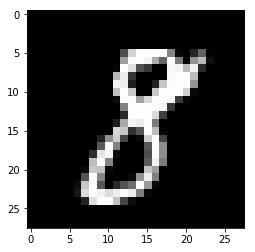

Prediction: 8


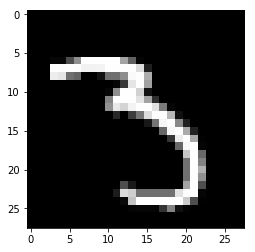

Prediction: 3


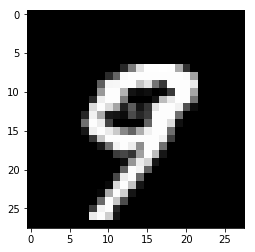

Prediction: 9


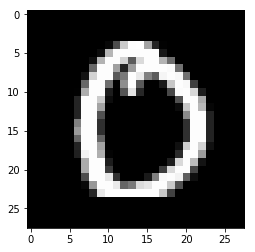

Prediction: 0


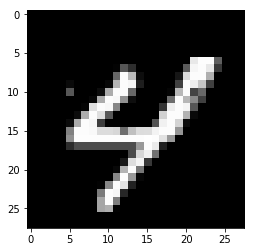

Prediction: 4


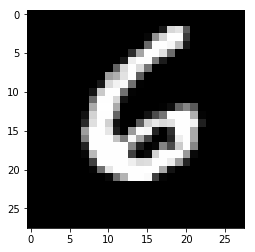

Prediction: 6


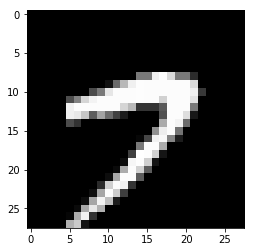

Prediction: 7


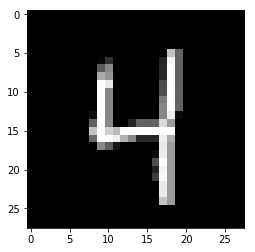

Prediction: 4


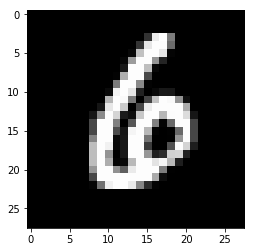

Prediction: 6


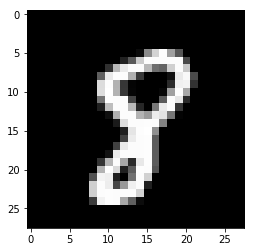

Prediction: 8


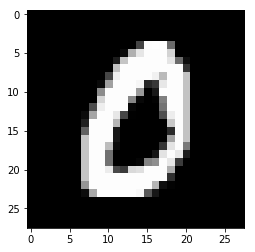

Prediction: 0


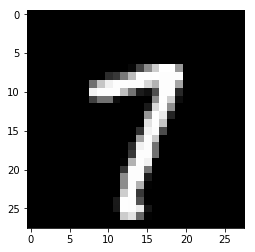

Prediction: 7


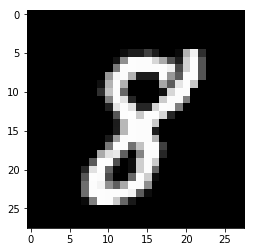

Prediction: 8


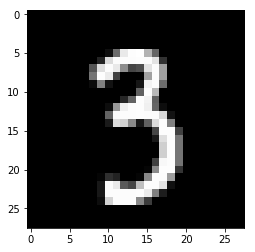

Prediction: 3


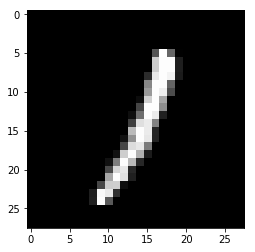

Prediction: 1


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 8, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1])

In [8]:
tf.reset_default_graph()
def forward_propagation_for_predict(X, parameters):
    """
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
    W4 = parameters['W4']
    b4 = parameters['b4'] 
    W5 = parameters['W5']
    b5 = parameters['b5']

    # Input 28 x 28 x 1, Padding = 2, Stride = 1, Filter = 5 x 5 x 1 x 6, Output = 28 x 28 x 6
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    # Input 28 x 28 x 6, Padding = 0, Stride = 2, Filter = 2 x 2, Output = 14 x 14 x 6
    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Input 14 x 14 x 6, Padding = 0, Stride = 1, Filter = 5 x 5 x 6 x 16, Output = 10 x 10 x 16
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'VALID')
    A2 = tf.nn.relu(Z2)
    # Input 10 x 10 x 16, Padding = 0, Stride = 2, Filter = 2 x 2, Output = 5 x 5 x 16
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    P2 = tf.contrib.layers.flatten(P2)
    
    Z3 = tf.matmul(tf.transpose(W3),tf.transpose(P2)) + b3.reshape(-1, 1)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.matmul(tf.transpose(W4), A3) + b4.reshape(-1, 1)
    A4 = tf.nn.relu(Z4)
    Z5 = tf.matmul(tf.transpose(W5), A4) + b5.reshape(-1, 1)
    
    return Z5

def predict(X, parameters):
    m, _, _, _ = X.shape
    x = tf.placeholder("float", [None, 28, 28, 1])
    
    Z5 = forward_propagation_for_predict(x, parameters)
    p = tf.argmax(Z5)
    
    print(X.shape)
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
    
    for i in range(m):
        plt.gray()
        plt.imshow(X[i][:,:,0])
        plt.show()
        print "Prediction:", prediction[i]

        
    return prediction

predict(X_valid[:100], parameters)